# Rice Classification

<img src="https://www.alerjidiyetisyeni.com/wp-content/uploads/2021/02/Pirinc-Alerjisi.jpg">

Bu projemizde pirinçleri CNN ve Transfer Learning(VGG16) kullanrak sınıflandıracağız

<a href="https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset">Dataya Buradan Erişebilirsiniz</a>

In [3]:
import cv2
import pandas as pd
import os

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

In [4]:
img_path="Rice_Image_Dataset/"
labels=os.listdir("Rice_Image_Dataset")

In [5]:
labels

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [6]:
#Dosyadan Resim okuma
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):       #Klasörün içindeki alt klasörleri söyler
        img_list.append(img_path+label+"/"+img_file)  #apppend dizinin sonuna eklme yapıyor
        label_list.append(label)

In [7]:
df=pd.DataFrame({"img":img_list,"label":label_list})

In [8]:
df.head()

,img,label
0,Rice_Image_Dataset/Arborio/Arborio (1).jpg,Arborio
1,Rice_Image_Dataset/Arborio/Arborio (10).jpg,Arborio
2,Rice_Image_Dataset/Arborio/Arborio (100).jpg,Arborio
3,Rice_Image_Dataset/Arborio/Arborio (1000).jpg,Arborio
4,Rice_Image_Dataset/Arborio/Arborio (10000).jpg,Arborio


In [9]:
d={'Arborio':0, 'Basmati':1, 'Ipsala':2, 'Jasmine':3, 'Karacadag':4}

In [10]:
df["encode_label"]=df["label"].map(d)

In [11]:
df.sample(5)

,img,label,encode_label
6679,Rice_Image_Dataset/Arborio/Arborio (2509).jpg,Arborio,0
22078,Rice_Image_Dataset/Basmati/basmati (2869).jpg,Basmati,1
30282,Rice_Image_Dataset/Ipsala/Ipsala (10251).jpg,Ipsala,2
69096,Rice_Image_Dataset/Karacadag/Karacadag (4685).jpg,Karacadag,4
39803,Rice_Image_Dataset/Ipsala/Ipsala (5320).jpg,Ipsala,2


In [12]:
def process_image(img):
        img=cv2.imread(img)
        img=cv2.resize(img,(70,70))
        img=img/255
        x.append(img)
        return img

In [13]:
x=[]
for img in df["img"]:
    process_image(img)    

In [14]:
x = np.array(x)

In [15]:
y=df["encode_label"]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [41]:
from keras.models import Sequential

In [42]:
from keras.layers import Conv2D,Dense,Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape

In [43]:
model=Sequential()
model.add(Input(shape=(70,70,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25)) # Burada 'rate' parametresini belirtiyoruz
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128))
model.add(Dense(5, activation='softmax')) 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [44]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15,verbose=1)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 103s 53ms/step - accuracy: 0.9086 - loss: 0.6575 - val_accuracy: 0.9869 - val_loss: 0.0905
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.9699 - loss: 0.1745 - val_accuracy: 0.9875 - val_loss: 0.0615
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.9749 - loss: 0.1145 - val_accuracy: 0.9869 - val_loss: 0.0437
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.9777 - loss: 0.0834 - val_accuracy: 0.9859 - val_loss: 0.0569
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 47ms/step - accuracy: 0.9806 - loss: 0.0771 - val_accuracy: 0.9715 - val_loss: 0.1093
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 47ms/step - accuracy: 0.9796 - loss: 0.0813 - val_accuracy: 0.9609 - val_loss: 0.1405
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 49ms/step - accuracy: 0.9825 - loss: 0.0750 - val_accuracy: 0.9867 - val_loss: 0.0855
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 48ms/step - accuracy: 0.9839 

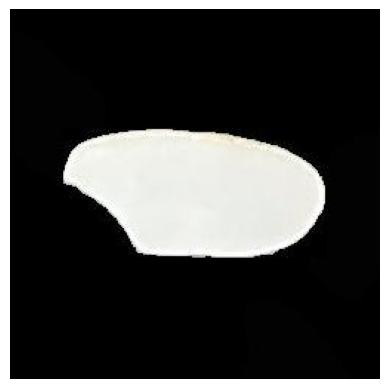

In [72]:
image_path = "Rice_Image_Dataset/Ipsala/Ipsala (8664).jpg"  # Görüntü dosyasının yolu
img = cv2.imread(image_path)  # Görüntüyü yükleme
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV, görüntüyü BGR formatında yükler; RGB'ye dönüştürelim
plt.imshow(img)# Görüntüyü gösterme
plt.axis('off')  # Eksenleri gizleme
plt.show()

In [54]:
def yb(img):
    img=cv2.imread(img)
    img=cv2.resize(img,(70,70))
    img=img/255
    img=np.expand_dims(img,axis=0)  # Modelin boyutunu arttırıyor
    return img

In [69]:
image=yb("Rice_Image_Dataset/Ipsala/Ipsala (8664).jpg")

In [57]:
prediction=model.predict(image)
predicted_class=np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [58]:
predicted_class

2

In [71]:
# {'Arborio':0, 'Basmati':1, 'Ipsala':2, 'Jasmine':3, 'Karacadag':4}

In [18]:
model.save("rice.h5")

### VGG16 ile

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Tek satırda resimlerin tamamını okumaya yarıyor

In [2]:
data_dir="Rice_Image_Dataset"
img_width,img_height=70,70

train_datagen=ImageDataGenerator(rescale=1/255, validation_split=0.20)

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode="sparse", subset="training")

test_datagen=ImageDataGenerator( rescale=1/255)
test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode="sparse", subset="validation")

base_model=VGG16(weights="imagenet", input_shape=(img_width,img_height,3),include_top=False)
model=Sequential()

model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False

model.add(Flatten())
model.add(Dense(1024,activation="relu")) # Dense nöronları birbirine bağlar
model.add(Dense(5,activation="softmax"))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(train_datagenerator,epochs=10,validation_data=test_datagenerator)

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.
Epoch 1/10


C:\Users\erkan\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 567s 301ms/step - accuracy: 0.9462 - loss: 0.1485 - val_accuracy: 0.9868 - val_loss: 0.0408
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 308s 164ms/step - accuracy: 0.9848 - loss: 0.0430 - val_accuracy: 0.9899 - val_loss: 0.0316
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 498s 266ms/step - accuracy: 0.9882 - loss: 0.0355 - val_accuracy: 0.9777 - val_loss: 0.0640
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 281s 150ms/step - accuracy: 0.9892 - loss: 0.0335 - val_accuracy: 0.9923 - val_loss: 0.0246
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 278s 148ms/step - accuracy: 0.9902 - loss: 0.0293 - val_accuracy: 0.9930 - val_loss: 0.0217
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 276s 147ms/step - accuracy: 0.9914 - loss: 0.0252 - val_accuracy: 0.9891 - val_loss: 0.0315
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 274s 146ms/step - accuracy: 0.9913 - loss: 0.0257 - val_accuracy: 0.9916 - val_loss: 0.0238
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 276s 147ms/step - accuracy: 0.9

In [3]:
model.save("rice_2.h5")

İlk modelimizde 98% İkinci modelimizde 99% accuracy elde ettik.